1. Plot the distribution according to activity type - Partial day logged obtained in Q5 under activity 3.
VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes. Write your observation.
2. Consider the "sleepDay_merged table". Extract day of week and prepare a new dataframe. Plot the distribution of variables in the dataframe.

3. Does day of week make any difference?. Visualise the dispersion of average steps, calories, and distance across days of the week using boxplot.

4. Plot the distribution of calories and distance from the table "dailyActivity_merged".
5. How do sedentary minutes change in weekends?
6. Create plots to visualize how this distribution depends on weekends and write your observation.

7. Create a columns to identify the user groups obtained in Q.6.
8. What do you observe from sleeping habits of each user group? Report your observation with a boxplot and a countplot. Also, print the values in each group.
9. Plot distinct users in each group.
10.Inspect the datasets to formulate a join query and prepare a new dataframe “activity_sleep_df” to report a regression plot between Total Minutes Asleep and Sedentary Minutes. Write your observation on sedentary users from the reported trend line.

In [6]:
import sqlite3 as sql

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import os

In [2]:
con = sql.connect("fitbit.db")
cur = con.cursor()

In [3]:
path = '../Data'
full_path_list = [ path + '/' + f for \
                 f in os.listdir(path) if os.path.isfile(os.path.join(path,f)) ]
full_path_list

['../Data/dailyActivity_merged.csv',
 '../Data/dailyCalories_merged.csv',
 '../Data/dailyIntensities_merged.csv',
 '../Data/dailySteps_merged.csv',
 '../Data/sleepDay_merged.csv',
 '../Data/weightLogInfo_merged.csv']

In [7]:
#The fitbit dataset is inclusive of hours and minutes datasets as well. However, for the purpose of this exercise,
# it is chosen to analyze daily aggregated data only.

# connect to sql db
con = sql.connect("fitbit.db")
cur = con.cursor()

def get_table_name(full_path_list, i):
    return full_path_list[i].split("/")[-1].split('.')[0]

pbar = tqdm(total=len(full_path_list), desc='[Loading Data...]')
for i in range(0,len(full_path_list)):
    pd.read_csv(full_path_list[i]).to_sql(get_table_name(full_path_list, i), con, if_exists='append', index=False)
    pbar.update(1)
pbar.close()

# simple sql query test
df = pd.read_sql(f'SELECT * FROM {get_table_name(full_path_list, 0)}', con)

df.head()

[Loading Data...]: 100%|█████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00,  9.91it/s]


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [8]:
full_info_activity = """
SELECT *,
    STRFTIME('%d',ActivityDate) day,
    STRFTIME('%m',ActivityDate) month,
    STRFTIME('%Y',ActivityDate) year,
    STRFTIME('%w',ActivityDate) dow
FROM dailyActivity_merged;
"""

In [9]:
dfact = pd.read_sql(full_info_activity, con)
dfact

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,day,month,year,dow
0,1503960366,2016-04-12,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985,12,04,2016,2
1,1503960366,2016-04-13,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797,13,04,2016,3
2,1503960366,2016-04-14,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776,14,04,2016,4
3,1503960366,2016-04-15,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745,15,04,2016,5
4,1503960366,2016-04-16,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863,16,04,2016,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1875,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,None,None,None,None
1876,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,None,None,None,None
1877,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832,None,None,None,None
1878,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832,None,None,None,None


VeryActiveMinutes 



C:\Users\klmsa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


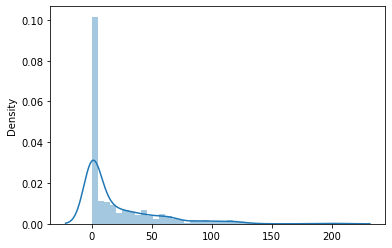



FairlyActiveMinutes 



C:\Users\klmsa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


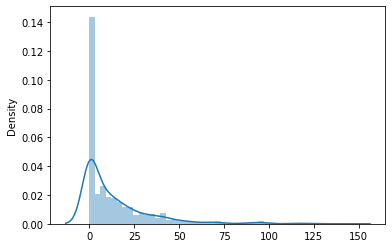

C:\Users\klmsa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)




LightlyActiveMinutes 



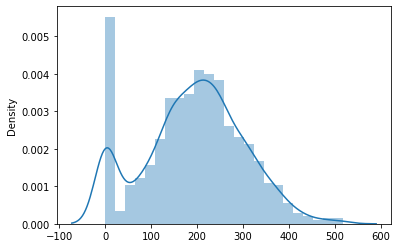

In [10]:
dfact = pd.read_sql("Select VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes from dailyActivity_merged", con)
dfact
for i in ["VeryActiveMinutes", "FairlyActiveMinutes", "LightlyActiveMinutes"]:
    print(i,"\n")
    sns.distplot(dfact[i].values)
    plt.show()
    print('\n')

Variables like VeryActiveMinutes and FairlyActiveMinutes seems to be right skewed but variable LightlyActiveMinutes seems to be bimodal by it's approximately a normal distribution

#### Consider the "sleepDay_merged table". Extract day of week and prepare a new dataframe. Plot the distribution of variables in the dataframe.

In [6]:
dfsleep = pd.read_sql("Select * from sleepDay_merged", con)
dfsleep

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,1,327,346
1,1503960366,2016-04-13,2,384,407
2,1503960366,2016-04-15,1,412,442
3,1503960366,2016-04-16,2,340,367
4,1503960366,2016-04-17,1,700,712
...,...,...,...,...,...
408,8792009665,2016-04-30,1,343,360
409,8792009665,2016-05-01,1,503,527
410,8792009665,2016-05-02,1,415,423
411,8792009665,2016-05-03,1,516,545


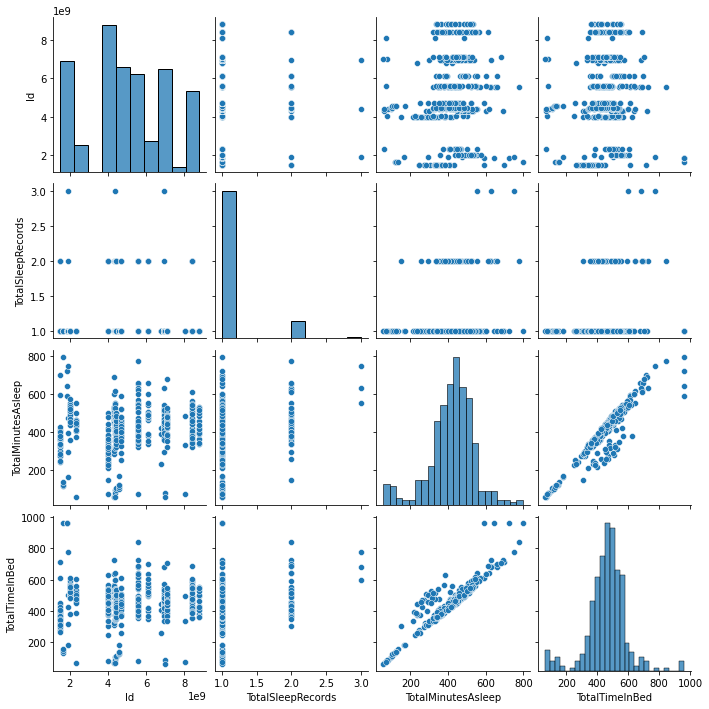

In [7]:
sns.pairplot(dfsleep)

##### Does day of week make any difference?. Visualise the dispersion of average steps, calories, and distance across days of the week using boxplot.

Day of week is 0 



C:\Users\klmsa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


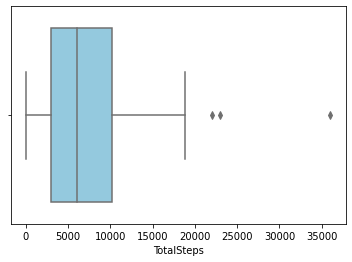

C:\Users\klmsa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


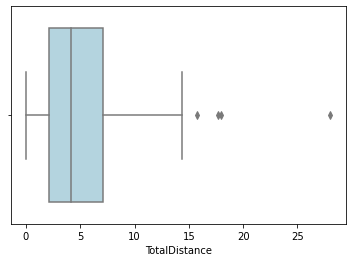

C:\Users\klmsa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


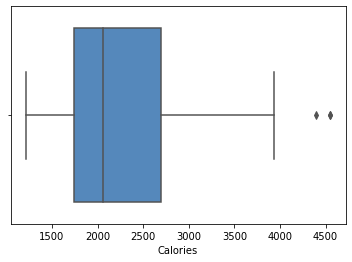



Day of week is 1 



C:\Users\klmsa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


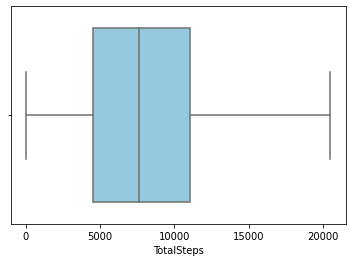

C:\Users\klmsa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


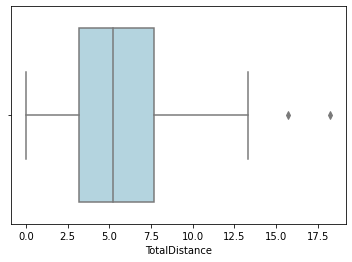

C:\Users\klmsa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


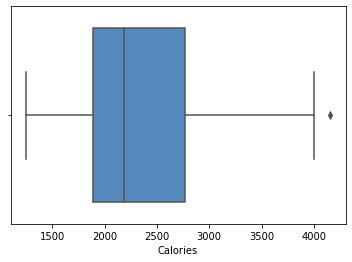



Day of week is 2 



C:\Users\klmsa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


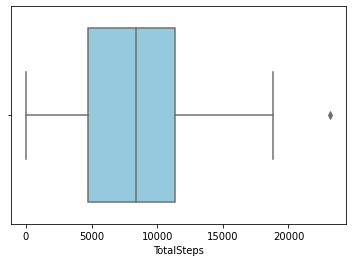

C:\Users\klmsa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


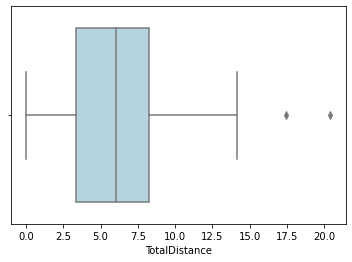

C:\Users\klmsa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


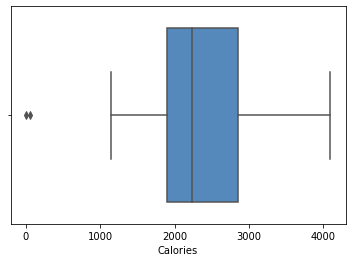



Day of week is 3 



C:\Users\klmsa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


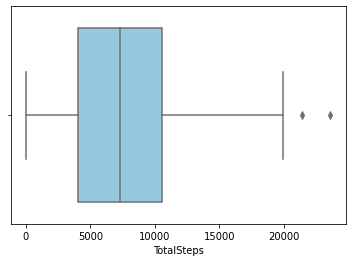

C:\Users\klmsa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


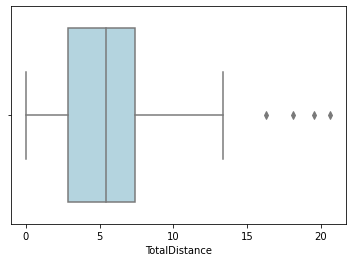

C:\Users\klmsa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


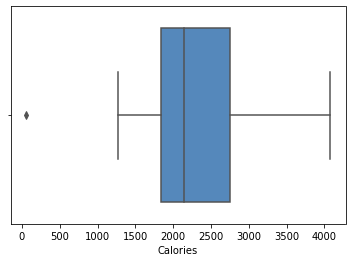

C:\Users\klmsa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(




Day of week is 4 



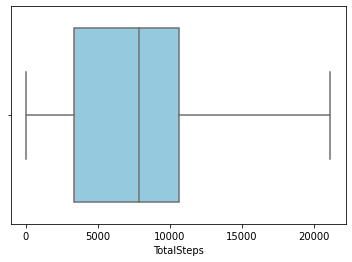

C:\Users\klmsa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


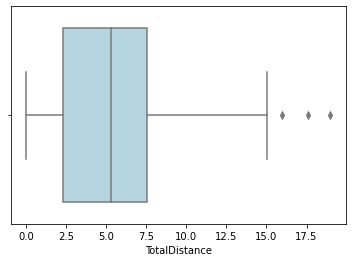

C:\Users\klmsa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


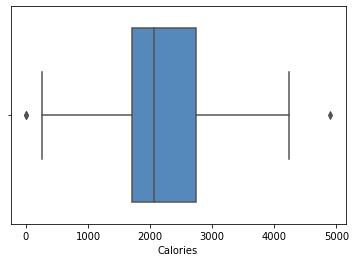



Day of week is 5 



C:\Users\klmsa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


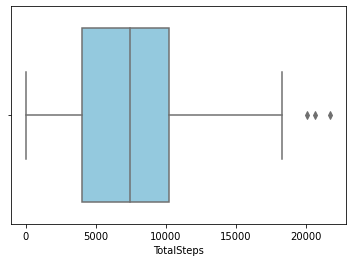

C:\Users\klmsa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


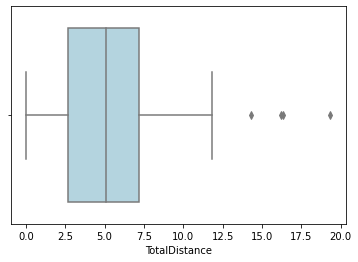

C:\Users\klmsa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


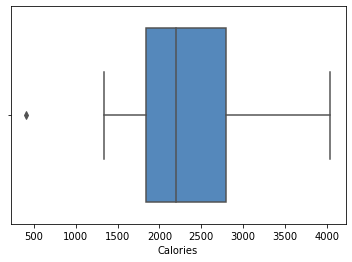

C:\Users\klmsa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(




Day of week is 6 



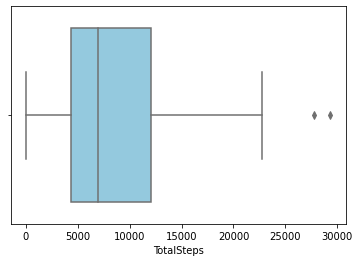

C:\Users\klmsa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


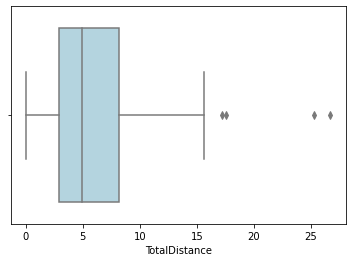

C:\Users\klmsa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


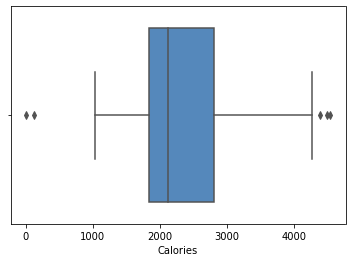

In [11]:
q = "Select TotalSteps, TotalDistance, Calories, STRFTIME('%w',ActivityDate) dow from dailyActivity_merged where dow = "
for i in range(7):
    df = pd.read_sql(q+"'"+str(i)+"'", con)
    print("Day of week is",i,"\n")
    sns.boxplot(df["TotalSteps"], color='skyblue')
    plt.show()
    sns.boxplot(df["TotalDistance"], color='lightblue')
    plt.show()
    sns.boxplot(df["Calories"], color='#48C')
    plt.show()
    print("\n")

##### Plot the distribution of calories and distance from the table "dailyActivity_merged".

C:\Users\Sivant\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Calories 



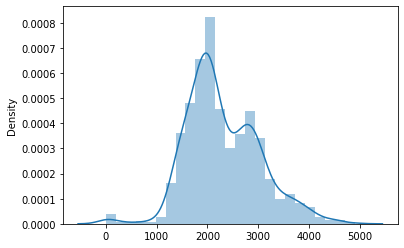


TotalDistance 



C:\Users\Sivant\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


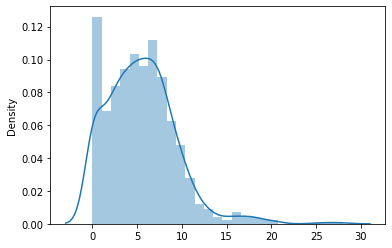

In [9]:
df4 = pd.read_sql("Select Calories, TotalDistance from dailyActivity_merged", con)
df4
for i in ["Calories", "TotalDistance"]:
    print(i,"\n")
    sns.distplot(df4[i].values)
    plt.show()
    print()

##### How do sedentary minutes change in weekends?

##### Create plots to visualize how this distribution depends on weekends and write your observation.

  dow    freq
0   0  119821
1   1  123353
2   2  153119
3   3  148422
4   4  141413
5   5  126039
6   6  119571


<BarContainer object of 2 artists>

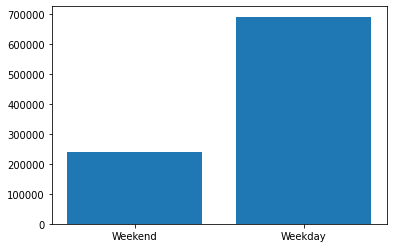

In [10]:
df5 = pd.read_sql("Select STRFTIME('%w',ActivityDate) dow, sum(SedentaryMinutes) freq from dailyActivity_merged  group by dow", con)
print(df5)
weekend = df5[(df5["dow"]=='0')|(df5["dow"]=='6')]["freq"].sum()
weekday = df5[(df5["dow"]!='0')&(df5["dow"]!='6')]["freq"].sum()
plt.bar(["Weekend","Weekday"],[weekend,weekday])

In [11]:
# "Boolean" column to check if date corresponds to weekend
weekend_query = """
SELECT
	Id,
	ActivityDate,
	SedentaryMinutes,
	VeryActiveMinutes,
	FairlyActiveMinutes,
	LightlyActiveMinutes,
	Calories,
	TotalSteps,
	TotalDistance,
	CASE
		WHEN STRFTIME('%w',ActivityDate) IN ('0','6')
			THEN 1
		ELSE 0
	END weekend
FROM dailyActivity_merged;
"""

weekend_check = pd.read_sql(weekend_query, con)

weekend_check.head()

,Id,ActivityDate,SedentaryMinutes,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,Calories,TotalSteps,TotalDistance,weekend
0,1503960366,2016-04-12,728,25,13,328,1985,13162,8.50,0
1,1503960366,2016-04-13,776,21,19,217,1797,10735,6.97,0
2,1503960366,2016-04-14,1218,30,11,181,1776,10460,6.74,0
3,1503960366,2016-04-15,726,29,34,209,1745,9762,6.28,0
4,1503960366,2016-04-16,773,36,10,221,1863,12669,8.16,1


Serdentary minutes is lower on the weekends than the week days

##### Create a columns to identify the user groups obtained in Q.6.

In [12]:
# get avg sed minutes
cur.execute("SELECT	AVG(SedentaryMinutes) FROM dailyActivity_merged;")
sedMinAvg = cur.fetchall()[0][0]
print(sedMinAvg)

991.2106382978724


In [13]:
query = """
SELECT
	Id,
	AVG(SedentaryMinutes) AS AvgSedentaryMinutes
FROM
	dailyActivity_merged
GROUP BY
	Id
ORDER BY
	AvgSedentaryMinutes DESC;
"""
avg_sed_minutes = pd.read_sql(query, con)

avg_sed_minutes

,Id,AvgSedentaryMinutes
0,1927972279,1317.419355
1,6775888955,1299.423077
2,8253242879,1287.368421
3,8583815059,1267.225806
4,1624580081,1257.741935
5,4020332650,1237.258065
6,2320127002,1220.096774
7,4057192912,1217.250000
8,1844505072,1206.612903
9,6290855005,1193.034483


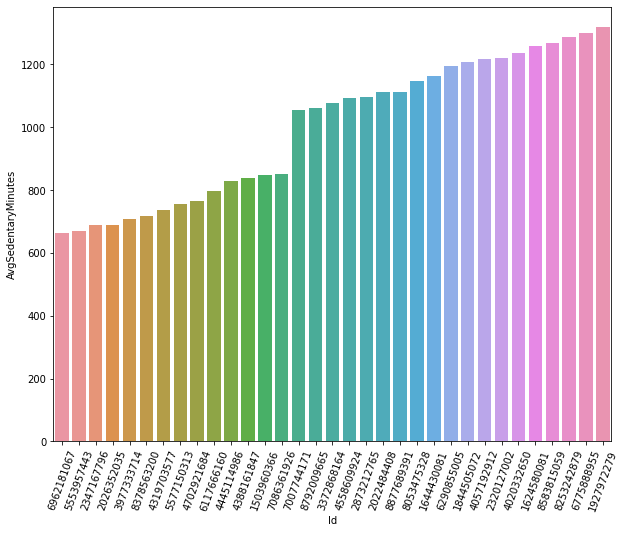

In [14]:
plt.figure(figsize=(10,8))
sns.barplot(data = avg_sed_minutes,
            x = 'Id', y = 'AvgSedentaryMinutes',
            order=avg_sed_minutes.sort_values('AvgSedentaryMinutes',ascending = True)['Id'])
plt.xticks(rotation=70);

Rows in group 0 (Less Sedentary group):
416
Rows in group 1 (More Sedentary group):
524
Distinct users in group 0 (Less Sedentary group)
14
Distinct users in group 1 (More Sedentary group)
19


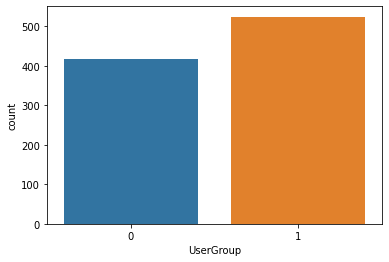

In [15]:
def is_above(user):
    '''Returns 1 if user has average SedentaryMinutes above the total average and 0 otherwise'''
    return int(avg_sed_minutes[avg_sed_minutes['Id']==user]['AvgSedentaryMinutes'].values[0] > sedMinAvg)

weekend_check['UserGroup'] = weekend_check['Id'].apply(is_above)

print(f'Rows in group 0 (Less Sedentary group):')
print(len(weekend_check[weekend_check['UserGroup']==0]))
print(f'Rows in group 1 (More Sedentary group):')
print(len(weekend_check[weekend_check['UserGroup']==1]))

print('Distinct users in group 0 (Less Sedentary group)')
print(weekend_check[weekend_check['UserGroup']==0]['Id'].nunique())

print('Distinct users in group 1 (More Sedentary group)')
print(weekend_check[weekend_check['UserGroup']==1]['Id'].nunique())

sns.countplot(data=weekend_check, x = 'UserGroup');

##### What do you observe from sleeping habits of each user group? Report your observation with a boxplot and a countplot. Also, print the values in each group.

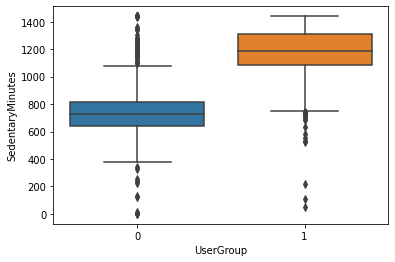

In [16]:
sns.boxplot(x="UserGroup", y="SedentaryMinutes", data=weekend_check);

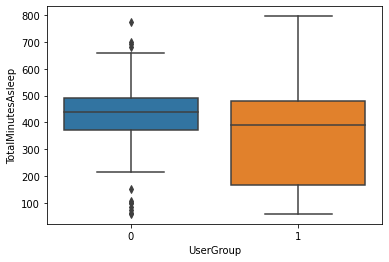

In [17]:
dfsleep['UserGroup'] = dfsleep['Id'].apply(is_above)

sns.boxplot(x="UserGroup", y="TotalMinutesAsleep", data=dfsleep);

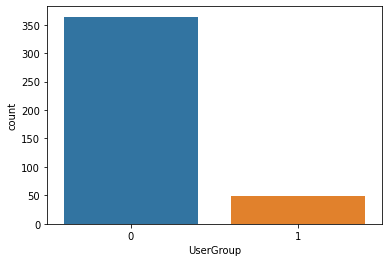

In [18]:
sns.countplot(data = dfsleep, x = 'UserGroup');

In [19]:
print('Distinct users in group 0 (Less Sedentary group)')
print(dfsleep[dfsleep['UserGroup']==0]['Id'].nunique())

print('Distinct users in group 1 (More Sedentary group)')
print(dfsleep[dfsleep['UserGroup']==1]['Id'].nunique())

Distinct users in group 0 (Less Sedentary group)
14
Distinct users in group 1 (More Sedentary group)
10


##### Inspect the datasets to formulate a join query and prepare a new dataframe “activity_sleep_df” to report a regression plot between Total Minutes Asleep and Sedentary Minutes. Write your observation on sedentary users from the reported trend line.

<AxesSubplot:xlabel='TotalMinutesAsleep', ylabel='SedentaryMinutes'>

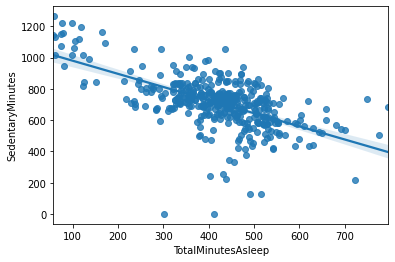

In [20]:
# Join activity and sleep data
join_query = """
SELECT 
	A.Id,
	A.ActivityDate,
	A.SedentaryMinutes,
	S.TotalMinutesAsleep
FROM 
	dailyActivity_merged A
INNER JOIN sleepDay_merged S
ON 
	A.Id = S.Id AND
    A.ActivityDate = S.SleepDay;
"""
activity_sleep_df = pd.read_sql(join_query, con)

sns.regplot(data = activity_sleep_df,
                x = 'TotalMinutesAsleep',
                y = 'SedentaryMinutes')